In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from PIL import Image
print(os.listdir("./common/data"))

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

['chest_xray', 'resampled', 'TEST']


Using TensorFlow backend.


# Find Class Imbalance

In [2]:
from common.src import resample as res

path = r'C:\Users\mmitk\dev\2020\pneumonia\common\data\chest_xray\train'
X, y = res.to_numpy_array(path)

from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced', np.unique(y), y)
class_weights = dict(enumerate(class_weights))
print(class_weights)

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
......................{0: 1.9448173005219984, 1: 0.6730322580645162}


C:\Users\mmitk\Anaconda3\envs\pnenv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0 1], y=[0 0 0 ... 1 1 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [3]:
from common.src import util

train_datagen = util.create_train_datagen()
test_datagen = util.create_test_datagen()

training_set = util.create_generator_set(train_datagen, './common/data/chest_xray/train/')
validation_generator = util.create_generator_set(test_datagen, './common/data/chest_xray/val/')
test_set = util.create_generator_set(test_datagen, './common/data/chest_xray/test/', batch_size = 1, shuffle = False) 

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Create/Load Model

In [4]:
from common.src import models

cnn = models.CNNModel(patience_s=19)
cnn.create_model()
cnn.summary()

# Fit Model

In [5]:
cnn_model = cnn.fit_generator(training_set, validation_generator, epochs = 20, class_weights = class_weights)

Epoch 1/20
163/163 [==============================] - 60s 367ms/step - loss: 0.4876 - tp: 3624.0000 - fp: 1357.0000 - tn: 3859.0000 - fn: 1592.0000 - accuracy: 0.7173 - precision: 0.7276 - recall: 0.6948 - auc: 0.8287 - val_loss: 0.3159 - val_tp: 285.0000 - val_fp: 19.0000 - val_tn: 285.0000 - val_fn: 19.0000 - val_accuracy: 0.9375 - val_precision: 0.9375 - val_recall: 0.9375 - val_auc: 0.9648
Epoch 2/20
163/163 [==============================] - 55s 337ms/step - loss: 0.2971 - tp: 4550.0000 - fp: 677.0000 - tn: 4539.0000 - fn: 666.0000 - accuracy: 0.8713 - precision: 0.8705 - recall: 0.8723 - auc: 0.9429 - val_loss: 0.3638 - val_tp: 228.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 76.0000 - val_accuracy: 0.7188 - val_precision: 0.7059 - val_recall: 0.7500 - val_auc: 0.9062
Epoch 3/20
163/163 [==============================] - 55s 340ms/step - loss: 0.2466 - tp: 4670.0000 - fp: 557.0000 - tn: 4659.0000 - fn: 546.0000 - accuracy: 0.8943 - precision: 0.8934 - recall: 0.8953 - auc:

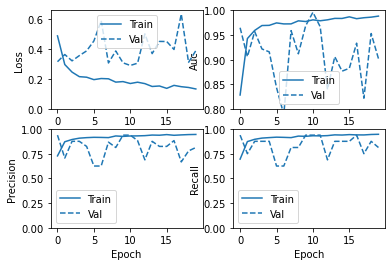

In [6]:
cnn.plot_history()

In [7]:
print(cnn.get_classification_report(test_set))

              precision    recall  f1-score   support

      NORMAL       0.80      0.85      0.83       234
   PNEUMONIA       0.90      0.88      0.89       390

    accuracy                           0.87       624
   macro avg       0.85      0.86      0.86       624
weighted avg       0.87      0.87      0.87       624

None


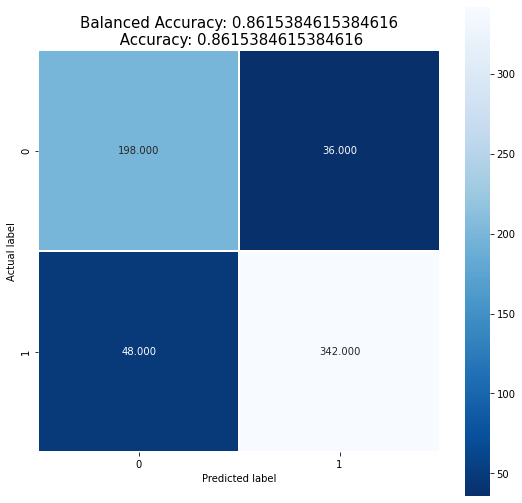

In [8]:
cnn.display_confusion_matrix(test_data_generator = test_set)